In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Reshape, GRU, RepeatVector, TimeDistributed, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Set dataset directories
train_dir = r'C:\Users\aishw\OneDrive\Desktop\fingerprint-based-blood-group-detection-main\fingerprint-based-blood-group-detection-main\dataset\splitted_dataset\aug'
val_dir = r'C:\Users\aishw\OneDrive\Desktop\fingerprint-based-blood-group-detection-main\fingerprint-based-blood-group-detection-main\dataset\splitted_dataset\val'
test_dir = r'C:\Users\aishw\OneDrive\Desktop\fingerprint-based-blood-group-detection-main\fingerprint-based-blood-group-detection-main\dataset\splitted_dataset\test'

In [3]:
# Parameters
img_height, img_width = 224, 224
batch_size = 32
epochs = 25

In [4]:
# Data generators
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
val_generator = datagen.flow_from_directory(val_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
test_generator = datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 22239 images belonging to 8 classes.
Found 1267 images belonging to 8 classes.
Found 1277 images belonging to 8 classes.


In [7]:
# MobileNet base model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = RepeatVector(1)(x)
x = GRU(128, return_sequences=False)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [8]:
# Train model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


C:\Users\aishw\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 659s 938ms/step - accuracy: 0.4162 - loss: 1.5667 - val_accuracy: 0.5383 - val_loss: 1.2095
Epoch 2/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 384s 552ms/step - accuracy: 0.6475 - loss: 0.9758 - val_accuracy: 0.6204 - val_loss: 1.0387
Epoch 3/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 390s 561ms/step - accuracy: 0.7064 - loss: 0.8245 - val_accuracy: 0.6543 - val_loss: 0.9544
Epoch 4/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 384s 553ms/step - accuracy: 0.7436 - loss: 0.7251 - val_accuracy: 0.6677 - val_loss: 0.9049
Epoch 5/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 358s 516ms/step - accuracy: 0.7645 - loss: 0.6638 - val_accuracy: 0.6756 - val_loss: 0.8665
Epoch 6/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 362s 521ms/step - accuracy: 0.7796 - loss: 0.6075 - val_accuracy: 0.6803 - val_loss: 0.8714
Epoch 7/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 361s 519ms/step - accuracy: 0.8035 - loss: 0.5605 - val_accuracy: 0.6906 - val_loss: 0.8238
Epoch 8/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 359s 517ms/step - accuracy: 0.8170 -

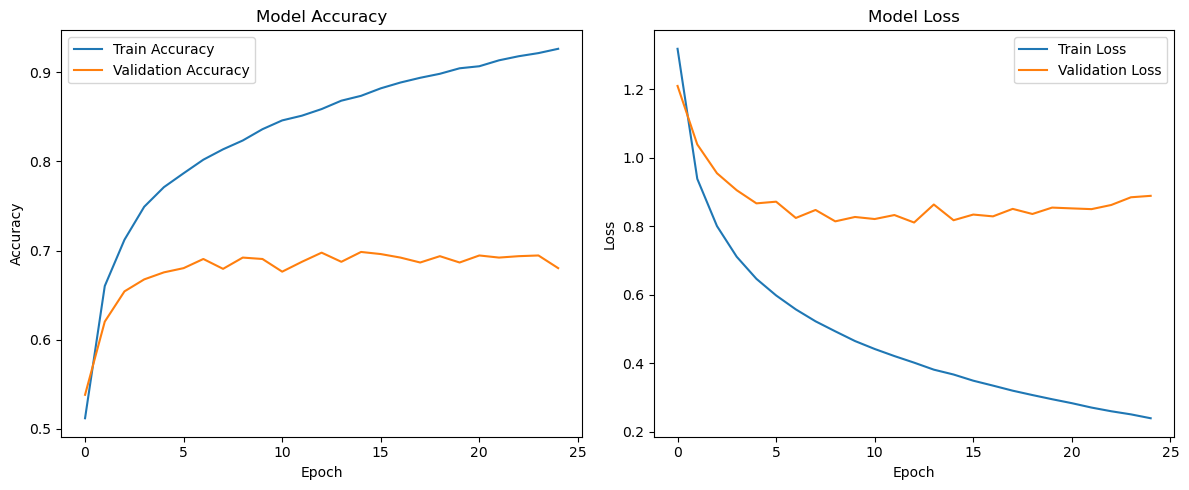

In [9]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 629ms/step - accuracy: 0.8062 - loss: 0.5399

Test Accuracy: 72.20%


40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 477ms/step

Classification Report:

              precision    recall  f1-score   support

          A+       0.65      0.88      0.75       139
          A-       0.65      0.83      0.73       201
         AB+       0.78      0.71      0.74       149
         AB-       0.66      0.82      0.73       153
          B+       0.77      0.63      0.69       165
          B-       0.90      0.84      0.87       149
          O+       0.77      0.57      0.65       178
          O-       0.70      0.50      0.58       143

    accuracy                           0.72      1277
   macro avg       0.73      0.72      0.72      1277
weighted avg       0.73      0.72      0.72      1277



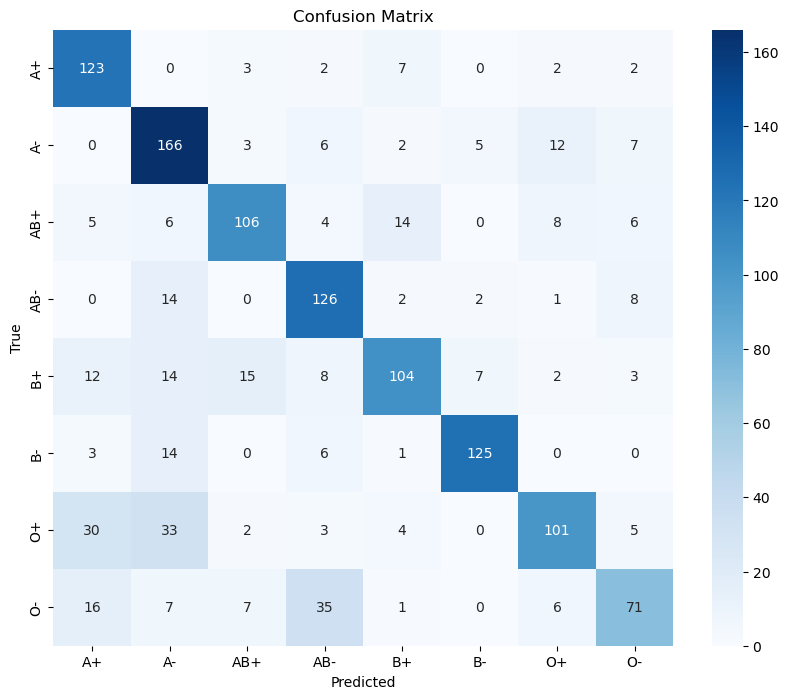

In [11]:
# Classification report and confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
